# Yelp Data Challenge - Restaurant Recommender

Meina Wang

Mar 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('dataset/last_1_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-12-10,0,exzXjy7Y2ICX_BEVTDWpJA,5,I got the filet mignon with seared foigras and...,0,Ymtd4cQypep_QZJ-qJsHuA


## Clean data and get rating data 

#### Select relevant columns in the original dataframe

In [4]:
df_rec = df[['business_id', 'user_id', 'stars']]
df_rec.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
1,--9e1ONYQuAa-CB_Rrw7Tw,3RTesI_MAwct13LWm4rhLw,4
2,--9e1ONYQuAa-CB_Rrw7Tw,EAOt1UQhJD0GG3l_jv7rWA,5
3,--9e1ONYQuAa-CB_Rrw7Tw,OtKA03ALQQ1CBhtaJod_Jw,2
4,--9e1ONYQuAa-CB_Rrw7Tw,Ymtd4cQypep_QZJ-qJsHuA,5


In [5]:
df_rec['stars'].value_counts()

5    83329
4    33537
1    22348
3    17546
2    13157
Name: stars, dtype: int64

In [6]:
df_user_count = df_rec['user_id'].value_counts()
df_user_count.head()
df_user_count.sum()

169917

In [7]:
df_user_count.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'YE54kKTuqJJPNYWIKIpOEQ', u'keBv05MsMFBd0Hu98vXThQ',
       u'P0rGN5mDue55uIiAzkrRlw', u'U4INQZOPSUaj8hMjLlZ3KA',
       u'bvzwsK8u5i0Kvvyfy7aT1Q', u'OXSJCjKtvZPf-YPDCXcWZg',
       u'8dxkcmAXY4ttrVFD1GhbdQ', u'sCelgwFoaNLMC_A7Y8usCw',
       ...
       u'Wh5DF9NfhhQzgGNIyhxDAA', u'DTL1ZIqnXlxE5gwWWLi8qw',
       u'EXLQpXJDGmcN-7_douwqZw', u'Rpqj6raY0tgxQuyu16NG2Q',
       u'Md5L1KjZfxTgVgq_Ions5A', u'uV74b2fN1xBkQVPHaY51CQ',
       u'aWJRNycIBB9rXqUniSAA9w', u'7KYnhbHu1Rr2HzFhFLGXxg',
       u'ekfX9Zb5VPYCIG-DAvQSWg', u'GIaCC4TfsHufCa66YW57Pg'],
      dtype='object', length=92274)

In [8]:
df_user_count.describe()

count    92274.000000
mean         1.841440
std          2.670796
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        156.000000
Name: user_id, dtype: float64

In [9]:
len([value for value in df_user_count if value == 1])

63971

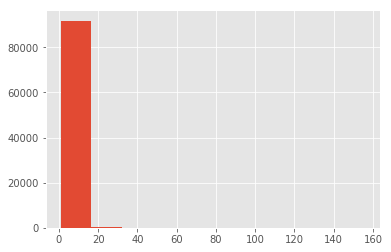

In [10]:
df_user_count.hist()
plt.show()

We can see the data is highly skewed - most people give only a few reviews.  So I take log transform to data.

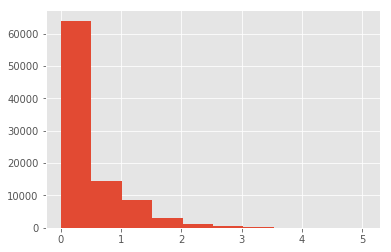

In [11]:
df_user_count.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender

In [22]:
# Select users comment over 5 times
df_users = df_user_count[df_user_count > 5]
df_users.head()

bLbSNkLggFnqwNNzzq-Ijw    156
JaqcCU3nxReTW2cBLHounA    100
YE54kKTuqJJPNYWIKIpOEQ     86
keBv05MsMFBd0Hu98vXThQ     82
P0rGN5mDue55uIiAzkrRlw     82
Name: user_id, dtype: int64

In [23]:
df_rec.set_index('user_id').head()

,business_id,stars
user_id,,
KC8H7qTZVPIEnanw9fG43g,--9e1ONYQuAa-CB_Rrw7Tw,5
3RTesI_MAwct13LWm4rhLw,--9e1ONYQuAa-CB_Rrw7Tw,4
EAOt1UQhJD0GG3l_jv7rWA,--9e1ONYQuAa-CB_Rrw7Tw,5
OtKA03ALQQ1CBhtaJod_Jw,--9e1ONYQuAa-CB_Rrw7Tw,2
Ymtd4cQypep_QZJ-qJsHuA,--9e1ONYQuAa-CB_Rrw7Tw,5


In [24]:
df_rec.set_index('user_id').loc[df_users.index].head()

,business_id,stars
user_id,,
bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,4
bLbSNkLggFnqwNNzzq-Ijw,0G83H_zoum-Q4bWU2olTqQ,4
bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
bLbSNkLggFnqwNNzzq-Ijw,0wW9PasC8pw8SY7rlY3ZKw,4
bLbSNkLggFnqwNNzzq-Ijw,1CaM8eIvl41l4f3V-V-cAw,4


In [25]:
df_rec_users = df_rec.set_index('user_id').loc[df_users.index].reset_index()

In [26]:
df_rec_users.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,4
1,bLbSNkLggFnqwNNzzq-Ijw,0G83H_zoum-Q4bWU2olTqQ,4
2,bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
3,bLbSNkLggFnqwNNzzq-Ijw,0wW9PasC8pw8SY7rlY3ZKw,4
4,bLbSNkLggFnqwNNzzq-Ijw,1CaM8eIvl41l4f3V-V-cAw,4


In [41]:
user_id = list(set(df_rec_users['user_id']))
business_id = list(set(df_rec_users['business_id']))

#### Create utility matrix from records

In [49]:
from scipy import sparse
highest_user_id = len(set(df_rec_users['user_id']))
highest_movie_id = len(set(df_rec_users['business_id']))
ratings_mat = sparse.lil_matrix((highest_user_id, highest_movie_id))
ratings_mat

<3688x3454 sparse matrix of type '<type 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [53]:
for _, row in df_rec_users.iterrows():
    ratings_mat[user_id.index(row.user_id), business_id.index(row.business_id)] = row.stars

In [54]:
ratings_mat

<3688x3454 sparse matrix of type '<type 'numpy.float64'>'
	with 40536 stored elements in LInked List format>

## Item-Item similarity recommender

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
item_sim_mat = cosine_similarity(ratings_mat.T)

In [56]:
least_to_most_sim_indexes = np.argsort(item_sim_mat, axis=1)

In [57]:
least_to_most_sim_indexes

array([[1726, 2283, 2284, ..., 2332, 2938,    0],
       [   0, 2258, 2259, ..., 2335, 2549,    1],
       [   0, 2297, 2298, ..., 1078, 1525,    2],
       ...,
       [   0, 2248, 2249, ..., 2926, 1282, 3451],
       [   0, 2259, 2260, ..., 2519,  725, 3452],
       [   0, 2269, 2270, ..., 3016, 2823, 3453]])

In [58]:
neighbors = least_to_most_sim_indexes[:, -80:]

In [59]:
# Let's pick a user and get make recommendation 
np.random.choice(df_rec_users['user_id'], 1)

array(['U_v8mw7fFh3rGTT_r0NGWg'], dtype=object)

In [60]:
user_id.index('U_v8mw7fFh3rGTT_r0NGWg')

1811

In [62]:
items_rated_by_this_user = ratings_mat[1811].nonzero()[1]

In [63]:
out = np.zeros(len(business_id))
for resturant_to_rate in range(len(business_id)):
    relevant_items = np.intersect1d(neighbors[resturant_to_rate],
                                   items_rated_by_this_user,
                                   assume_unique = True)
    out[resturant_to_rate] = ratings_mat[1811, relevant_items] * item_sim_mat[resturant_to_rate, relevant_items] / \
    item_sim_mat[resturant_to_rate, relevant_items].sum()

pred_stars = np.nan_to_num(out)

/Users/meinawang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [64]:
pred_stars

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
item_index_sorted_by_pred_rating = list(np.argsort(pred_stars))[::-1]

In [66]:
unrated_items_by_pred_rating = [resturant for resturant in item_index_sorted_by_pred_rating if resturant not in items_rated_by_this_user]
print(unrated_items_by_pred_rating[:10])

[1494, 2433, 2553, 390, 587, 44, 182, 2934, 1039, 1741]


In [76]:
print("The top ten recommendation for user %s are: " % ('U_v8mw7fFh3rGTT_r0NGWg'))
print('%s' % (','.join(list(set(df['name'][df['business_id'] == business_id[i]]))[0] \
                       for i in unrated_items_by_pred_rating[:10])))

The top ten recommendation for user U_v8mw7fFh3rGTT_r0NGWg are: 
Border Grill,Grimaldi's Pizzeria,Burger Bar,Lola's A Louisana Kitchen,Rocco's NY Pizzeria,House of Blues - Music Venue,Strip N Dip Chicken Strips,LOL Kids Club,Freed's Bakery,Hanabi


In [83]:
print("The users original rated resturants are :\n %s" % (','.join(list(set(df['name'][df['business_id'] == business_id[i]]))[0] \
                       for i in items_rated_by_this_user)))

The users original rated resturants are :
 Carl's Jr,Chick-fil-A,Chuck E. Cheese's,Hot Dog on a Stick,New York Pizza & Pasta,Little Caesars,Wahlburgers,Yummy Grill & Sushi,Taco Bell,Frijoles & Frescas Grilled Tacos
